In [2]:
#load libraries
import pandas as pd
import numpy as np

%matplotlib inline
import random
import matplotlib.pyplot as plt

In [3]:
#First, load population files
path = '/Users/michaelshemko/Downloads/' 
filename_pop=path + 'pop.csv'
lookup_pop = pd.read_csv(filename_pop)

In [4]:
lookup_pop.head()

Country  Admin1 SubDiv  Year  Sex  Frmat       Pop1      Pop2      Pop3  \
0     1060     NaN    NaN  1980    1      7   137100.0    3400.0   15800.0   
1     1060     NaN    NaN  1980    2      7   159000.0    4000.0   18400.0   
2     1125     NaN    NaN  1955    1      2  5051500.0  150300.0  543400.0   
3     1125     NaN    NaN  1955    2      2  5049400.0  145200.0  551000.0   
4     1125     NaN    NaN  1956    1      2  5353700.0  158700.0  576600.0   

   Pop4    ...        Pop18    Pop19    Pop20    Pop21    Pop22    Pop23  \
0   NaN    ...          NaN   5300.0      NaN   2900.0      NaN      NaN   
1   NaN    ...          NaN   6200.0      NaN   3400.0      NaN      NaN   
2   NaN    ...     110200.0  51100.0  41600.0  14300.0  11800.0  25300.0   
3   NaN    ...     122100.0  51100.0  50700.0  15800.0  18000.0  28500.0   
4   NaN    ...     116900.0  54100.0  44000.0  14900.0  12400.0  26600.0   

   Pop24  Pop25   Pop26        Lb  
0    NaN    NaN  6500.0    5000.0  
1    NaN    NaN  7500.0    6000.0  
2    NaN    NaN     0.0  253329.0  
3    NaN    NaN     0.0  237901.0  
4    NaN    NaN     0.0  250022.0  

[5 rows x 33 columns]

In [5]:
#Next we need the country code file, so that we can identify
#the countries of interest - Iceland, Italy, New Zealand
path = '/Users/michaelshemko/Downloads/' 
filename_countries=path + 'country_codes.csv'
lookup_countries = pd.read_csv(filename_countries)

In [6]:
lookup_countries.head()

country          name
0     1010       Algeria
1     1020        Angola
2     1025         Benin
3     1030      Botswana
4     1035  Burkina Faso

In [7]:
#find Iceland, Italy, New Zealand

countries = ["Iceland", "Italy", "New Zealand"]

lookup_countries.name.isin(countries)

our_countries= lookup_countries[lookup_countries.name.isin(countries)]

our_countries.shape

(3, 2)

In [8]:
our_countries

country         name
174     4160      Iceland
176     4180        Italy
218     5150  New Zealand

In [9]:
#so our country codes of interest are 4160, 4180, and 5150
#now, we can use these codes to find the rows in the population file
country_codes = ["4160", "4180", "5150"]

lookup_pop.Country.isin(countries)

country_pop= lookup_pop[lookup_pop.Country.isin(country_codes)]

country_pop.shape

(396, 33)

In [10]:
country_pop.head()

Country  Admin1 SubDiv  Year  Sex  Frmat     Pop1    Pop2    Pop3  \
5831     4160     NaN    NaN  1950    1      1  71300.0  2000.0  1900.0   
5832     4160     NaN    NaN  1950    2      1  71300.0  1900.0  1800.0   
5833     4160     NaN    NaN  1951    1      1  72900.0  2000.0  2000.0   
5834     4160     NaN    NaN  1951    2      1  72500.0  1900.0  1800.0   
5835     4160     NaN    NaN  1952    1      1  74200.0  2000.0  2000.0   

        Pop4   ...     Pop18   Pop19   Pop20   Pop21  Pop22  Pop23  Pop24  \
5831  1900.0   ...    2200.0  1600.0  1300.0   900.0  500.0  300.0    NaN   
5832  1800.0   ...    2500.0  1900.0  1700.0  1200.0  800.0  500.0    NaN   
5833  1900.0   ...    2300.0  1700.0  1300.0   900.0  500.0  300.0    NaN   
5834  1800.0   ...    2500.0  2000.0  1600.0  1300.0  800.0  600.0    NaN   
5835  2000.0   ...    2500.0  1800.0  1300.0  1000.0  500.0  300.0    NaN   

      Pop25  Pop26      Lb  
5831    NaN  100.0  2152.0  
5832    NaN  200.0  1941.0  
5833    NaN    0.0  2152.0  
5834    NaN    0.0  1950.0  
5835    NaN    0.0  2152.0  

[5 rows x 33 columns]

In [11]:
#slicing out only the year of iterest 2010
year_interest = ["2010"]

country_pop.Year.isin(countries)

countries_2010= country_pop[country_pop.Year.isin(year_interest)]

countries_2010.shape

(6, 33)

In [12]:
countries_2010

Country  Admin1 SubDiv  Year  Sex  Frmat        Pop1      Pop2  \
5951     4160     NaN    NaN  2010    1      0    159971.0    2529.0   
5952     4160     NaN    NaN  2010    2      0    158070.0    2409.0   
6213     4180     NaN    NaN  2010    1      0  29350339.0  287504.0   
6214     4180     NaN    NaN  2010    2      0  31133047.0  271675.0   
9369     5150     NaN    NaN  2010    1      1   2144390.0   32600.0   
9370     5150     NaN    NaN  2010    2      1   2222970.0   31160.0   

          Pop3      Pop4    ...         Pop18      Pop19      Pop20  \
5951    2483.5    2412.0    ...        7880.0     5658.5     4143.5   
5952    2380.5    2271.0    ...        7536.0     5835.0     4448.0   
6213  292981.0  294030.0    ...     1814773.0  1468434.0  1400990.0   
6214  278129.0  279329.0    ...     1942734.0  1639280.0  1667754.0   
9369   32650.0   32920.0    ...      113060.0    85970.0    65470.0   
9370   30390.0   31120.0    ...      117190.0    90220.0    71450.0   

          Pop21      Pop22     Pop23     Pop24     Pop25  Pop26        Lb  
5951     3600.0     2577.0    1284.0     401.0      68.0    0.0    2523.0  
5952     4155.0     3374.0    2051.0     798.5     227.5    0.0    2384.0  
6213  1078455.0   725761.0  371286.0   90114.0   29700.0    0.0  286701.0  
6214  1453468.0  1186271.0  788191.0  247726.0  106576.0    0.0  270104.0  
9369    48870.0    34800.0   23940.0       NaN       NaN    0.0   33163.0  
9370    56300.0    45900.0   46170.0       NaN       NaN    0.0   31229.0  

[6 rows x 33 columns]

In [13]:
#now we can group by country and sum the male and female total
#population to get the total country population in 2010
countries_2010.groupby('Country')['Pop1'].sum()

Country
4160      318041.0
4180    60483386.0
5150     4367360.0
Name: Pop1, dtype: float64

In [14]:
#This gives us the answer to the first question in the assignment
#total 2010 population for the countries of interest
#Iceland  318,041
#Italy  60,483,386
#New Zealand  4,367,360

In [15]:
#For deaths, we need to use the individual ICD files, and we are 
#interested in ICD-10, so we use these files
path = '/Users/michaelshemko/Downloads/' 
filename_icdpart1=path + 'Morticd10_part1.csv'
lookup_icdpart1 = pd.read_csv(filename_icdpart1)

/Users/michaelshemko/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
lookup_icdpart1.head()

Country  Admin1  SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  Deaths1  \
0     1400     NaN     NaN  2001  101  1000    1      7         8      332   
1     1400     NaN     NaN  2001  101  1000    2      7         8      222   
2     1400     NaN     NaN  2001  101  1001    1      7         8       24   
3     1400     NaN     NaN  2001  101  1001    2      7         8       14   
4     1400     NaN     NaN  2001  101  1002    1      7         8        0   

      ...      Deaths21  Deaths22  Deaths23  Deaths24  Deaths25  Deaths26  \
0     ...          95.0       NaN       NaN       NaN       NaN       0.0   
1     ...         112.0       NaN       NaN       NaN       NaN       0.0   
2     ...           5.0       NaN       NaN       NaN       NaN       0.0   
3     ...           6.0       NaN       NaN       NaN       NaN       0.0   
4     ...           0.0       NaN       NaN       NaN       NaN       0.0   

   IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
0         8.0         NaN         NaN         NaN  
1        11.0         NaN         NaN         NaN  
2         0.0         NaN         NaN         NaN  
3         0.0         NaN         NaN         NaN  
4         0.0         NaN         NaN         NaN  

[5 rows x 39 columns]

In [17]:
#Loading the second icd10 part file
path = '/Users/michaelshemko/Downloads/' 
filename_icdpart2=path + 'Morticd10_part2.csv'
lookup_icdpart2 = pd.read_csv(filename_icdpart2)

/Users/michaelshemko/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
lookup_icdpart2.head()

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  Deaths1  \
0     1400     NaN    NaN  2005  101  1000    1      7         8      386   
1     1400     NaN    NaN  2005  101  1000    2      7         8      287   
2     1400     NaN    NaN  2005  101  1001    1      7         8       29   
3     1400     NaN    NaN  2005  101  1001    2      7         8       21   
4     1400     NaN    NaN  2005  101  1002    1      7         8        0   

      ...      Deaths21  Deaths22  Deaths23  Deaths24  Deaths25  Deaths26  \
0     ...         136.0       NaN       NaN       NaN       NaN       0.0   
1     ...         163.0       NaN       NaN       NaN       NaN       0.0   
2     ...          13.0       NaN       NaN       NaN       NaN       0.0   
3     ...          16.0       NaN       NaN       NaN       NaN       0.0   
4     ...           0.0       NaN       NaN       NaN       NaN       0.0   

   IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
0        10.0         NaN         NaN         NaN  
1         6.0         NaN         NaN         NaN  
2         0.0         NaN         NaN         NaN  
3         0.0         NaN         NaN         NaN  
4         0.0         NaN         NaN         NaN  

[5 rows x 39 columns]

In [19]:
#Join both parts of the icd file
lookup_bothicd = pd.concat([lookup_icdpart1, lookup_icdpart2])
lookup_bothicd.head()

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  Deaths1  \
0     1400     NaN    NaN  2001  101  1000    1      7         8      332   
1     1400     NaN    NaN  2001  101  1000    2      7         8      222   
2     1400     NaN    NaN  2001  101  1001    1      7         8       24   
3     1400     NaN    NaN  2001  101  1001    2      7         8       14   
4     1400     NaN    NaN  2001  101  1002    1      7         8        0   

      ...      Deaths21  Deaths22  Deaths23  Deaths24  Deaths25  Deaths26  \
0     ...          95.0       NaN       NaN       NaN       NaN       0.0   
1     ...         112.0       NaN       NaN       NaN       NaN       0.0   
2     ...           5.0       NaN       NaN       NaN       NaN       0.0   
3     ...           6.0       NaN       NaN       NaN       NaN       0.0   
4     ...           0.0       NaN       NaN       NaN       NaN       0.0   

   IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
0         8.0         NaN         NaN         NaN  
1        11.0         NaN         NaN         NaN  
2         0.0         NaN         NaN         NaN  
3         0.0         NaN         NaN         NaN  
4         0.0         NaN         NaN         NaN  

[5 rows x 39 columns]

In [20]:
lookup_bothicd.shape

(3704896, 39)

In [21]:
#Now we have a large file containing deaths by all causes by all
#years and for all countries
lookup_bothicd.head()

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  Deaths1  \
0     1400     NaN    NaN  2001  101  1000    1      7         8      332   
1     1400     NaN    NaN  2001  101  1000    2      7         8      222   
2     1400     NaN    NaN  2001  101  1001    1      7         8       24   
3     1400     NaN    NaN  2001  101  1001    2      7         8       14   
4     1400     NaN    NaN  2001  101  1002    1      7         8        0   

      ...      Deaths21  Deaths22  Deaths23  Deaths24  Deaths25  Deaths26  \
0     ...          95.0       NaN       NaN       NaN       NaN       0.0   
1     ...         112.0       NaN       NaN       NaN       NaN       0.0   
2     ...           5.0       NaN       NaN       NaN       NaN       0.0   
3     ...           6.0       NaN       NaN       NaN       NaN       0.0   
4     ...           0.0       NaN       NaN       NaN       NaN       0.0   

   IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
0         8.0         NaN         NaN         NaN  
1        11.0         NaN         NaN         NaN  
2         0.0         NaN         NaN         NaN  
3         0.0         NaN         NaN         NaN  
4         0.0         NaN         NaN         NaN  

[5 rows x 39 columns]

In [22]:
#Again, selecting out our countries of interest
country_codes = ["4160", "4180", "5150"]

lookup_bothicd.Country.isin(country_codes)

country_deaths= lookup_bothicd[lookup_bothicd.Country.isin(country_codes)]

country_deaths.shape

(103089, 39)

In [23]:
#Now we have our subset of countries
country_deaths.head()

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
1049428     4160     NaN    NaN  1996  104   A09    1      0         1   
1049429     4160     NaN    NaN  1996  104   A09    2      0         1   
1049430     4160     NaN    NaN  1996  104  A390    2      0         1   
1049431     4160     NaN    NaN  1996  104  A419    1      0         1   
1049432     4160     NaN    NaN  1996  104  A419    2      0         1   

         Deaths1     ...      Deaths21  Deaths22  Deaths23  Deaths24  \
1049428        1     ...           0.0       0.0       0.0       0.0   
1049429        1     ...           0.0       0.0       0.0       0.0   
1049430        1     ...           0.0       0.0       0.0       0.0   
1049431        2     ...           0.0       0.0       0.0       0.0   
1049432        1     ...           0.0       0.0       1.0       0.0   

         Deaths25  Deaths26  IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
1049428       0.0       0.0         0.0         0.0         0.0         0.0  
1049429       1.0       0.0         0.0         0.0         0.0         0.0  
1049430       0.0       0.0         0.0         0.0         0.0         0.0  
1049431       0.0       0.0         0.0         0.0         0.0         0.0  
1049432       0.0       0.0         0.0         0.0         0.0         0.0  

[5 rows x 39 columns]

In [24]:
#Selecting out only 2010 now
year_interest = ["2010"]

country_deaths.Year.isin(year_interest)

countries_icd_2010= country_deaths[country_deaths.Year.isin(year_interest)]

countries_icd_2010.shape

(7382, 39)

In [25]:
countries_icd_2010.head(15)

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
148772     4160     NaN    NaN  2010  103   A04    2      0         1   
148773     4160     NaN    NaN  2010  103   A05    2      0         1   
148774     4160     NaN    NaN  2010  103   A39    1      0         1   
148775     4160     NaN    NaN  2010  103   A41    1      0         1   
148776     4160     NaN    NaN  2010  103   A41    2      0         1   
148777     4160     NaN    NaN  2010  103   AAA    1      0         1   
148778     4160     NaN    NaN  2010  103   AAA    2      0         1   
148779     4160     NaN    NaN  2010  103   B90    1      0         1   
148780     4160     NaN    NaN  2010  103   B90    2      0         1   
148781     4160     NaN    NaN  2010  103   C00    2      0         1   
148782     4160     NaN    NaN  2010  103   C01    1      0         1   
148783     4160     NaN    NaN  2010  103   C01    2      0         1   
148784     4160     NaN    NaN  2010  103   C02    2      0         1   
148785     4160     NaN    NaN  2010  103   C05    1      0         1   
148786     4160     NaN    NaN  2010  103   C07    2      0         1   

        Deaths1     ...      Deaths21  Deaths22  Deaths23  Deaths24  Deaths25  \
148772        1     ...           0.0       1.0       0.0       0.0       0.0   
148773        1     ...           0.0       0.0       0.0       1.0       0.0   
148774        1     ...           0.0       0.0       0.0       0.0       0.0   
148775        5     ...           0.0       0.0       1.0       1.0       0.0   
148776        3     ...           2.0       0.0       0.0       1.0       0.0   
148777     1064     ...         158.0     199.0     185.0     113.0      29.0   
148778      955     ...         115.0     168.0     210.0     148.0      73.0   
148779        1     ...           1.0       0.0       0.0       0.0       0.0   
148780        1     ...           0.0       0.0       1.0       0.0       0.0   
148781        1     ...           0.0       0.0       0.0       1.0       0.0   
148782        1     ...           1.0       0.0       0.0       0.0       0.0   
148783        1     ...           0.0       0.0       0.0       0.0       0.0   
148784        1     ...           0.0       0.0       0.0       0.0       0.0   
148785        1     ...           0.0       0.0       0.0       0.0       0.0   
148786        1     ...           0.0       0.0       0.0       0.0       0.0   

        Deaths26  IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
148772       0.0         0.0         0.0         0.0         0.0  
148773       0.0         0.0         0.0         0.0         0.0  
148774       0.0         0.0         0.0         0.0         0.0  
148775       0.0         0.0         0.0         0.0         0.0  
148776       0.0         0.0         0.0         0.0         0.0  
148777       0.0         3.0         0.0         0.0         2.0  
148778       0.0         1.0         1.0         1.0         3.0  
148779       0.0         0.0         0.0         0.0         0.0  
148780       0.0         0.0         0.0         0.0         0.0  
148781       0.0         0.0         0.0         0.0         0.0  
148782       0.0         0.0         0.0         0.0         0.0  
148783       0.0         0.0         0.0         0.0         0.0  
148784       0.0         0.0         0.0         0.0         0.0  
148785       0.0         0.0         0.0         0.0         0.0  
148786       0.0         0.0         0.0         0.0         0.0  

[15 rows x 39 columns]

In [26]:
#Using Deaths1 which is all deaths of all ages, and leaving
#other variables alone, we can sum on Deaths1 by country
countries_icd_2010.groupby('Country')['Deaths1'].sum()

Country
4160       4038
4180    1169230
5150      57298
Name: Deaths1, dtype: int64

In [27]:
#This is a check and corresponds to figures 

In [28]:
#Exploring the data, looking at countries and causes
countries_icd_2010.groupby(['Country','Cause'])['Deaths1'].sum()

Country  Cause
4160     A04         1
         A05         1
         A39         1
         A41         8
         AAA      2019
         B90         2
         C00         1
         C01         2
         C02         1
         C05         1
         C07         1
         C09         1
         C15        19
         C16        27
         C17         3
         C18        41
         C20        10
         C21         1
         C22        18
         C24         5
         C25        31
         C26         1
         C31         1
         C32         2
         C34       144
         C38         1
         C40         1
         C41         2
         C43        13
         C44         2
                  ... 
5150     X910        2
         X951        1
         X952        2
         X953        2
         X959        2
         X970        1
         X990       14
         X999        6
         Y000        6
         Y040        8
         Y070        3
         Y090      

In [29]:
#Transform to a pd dataframe to be sure
pa=pd.DataFrame(countries_icd_2010)

In [30]:
pa.head()

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
148772     4160     NaN    NaN  2010  103   A04    2      0         1   
148773     4160     NaN    NaN  2010  103   A05    2      0         1   
148774     4160     NaN    NaN  2010  103   A39    1      0         1   
148775     4160     NaN    NaN  2010  103   A41    1      0         1   
148776     4160     NaN    NaN  2010  103   A41    2      0         1   

        Deaths1     ...      Deaths21  Deaths22  Deaths23  Deaths24  Deaths25  \
148772        1     ...           0.0       1.0       0.0       0.0       0.0   
148773        1     ...           0.0       0.0       0.0       1.0       0.0   
148774        1     ...           0.0       0.0       0.0       0.0       0.0   
148775        5     ...           0.0       0.0       1.0       1.0       0.0   
148776        3     ...           2.0       0.0       0.0       1.0       0.0   

        Deaths26  IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
148772       0.0         0.0         0.0         0.0         0.0  
148773       0.0         0.0         0.0         0.0         0.0  
148774       0.0         0.0         0.0         0.0         0.0  
148775       0.0         0.0         0.0         0.0         0.0  
148776       0.0         0.0         0.0         0.0         0.0  

[5 rows x 39 columns]

In [32]:
#Now we can select the death age band columns of interest for the next part
array = ['Deaths1',
'Deaths2',
'Deaths3',
'Deaths4',
'Deaths5',
'Deaths6',
'Deaths7',
'Deaths8',
'Deaths9',
'Deaths10',
'Deaths11',
'Deaths12',
'Deaths13',
'Deaths14',
'Deaths15',
'Deaths16',
'Deaths17',
'Deaths18',
'Deaths19',
'Deaths20',
'Deaths21',
'Deaths22',
'Deaths23',
'Deaths24']
#pa.loc[pa['']]

In [33]:
pa.tail()

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
2296449     5150     NaN    NaN  2010  104   Y86    1      0         1   
2296450     5150     NaN    NaN  2010  104   Y86    2      0         1   
2296451     5150     NaN    NaN  2010  104  Y870    2      0         1   
2296452     5150     NaN    NaN  2010  104  Y871    1      0         1   
2296453     5150     NaN    NaN  2010  104  Y899    1      0         1   

         Deaths1     ...      Deaths21  Deaths22  Deaths23  Deaths24  \
2296449       23     ...           3.0       1.0       3.0       5.0   
2296450       18     ...           2.0       2.0       5.0       5.0   
2296451        1     ...           0.0       0.0       0.0       0.0   
2296452        1     ...           0.0       0.0       0.0       0.0   
2296453        1     ...           0.0       0.0       0.0       0.0   

         Deaths25  Deaths26  IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
2296449       0.0       0.0         0.0         0.0         0.0         0.0  
2296450       2.0       0.0         0.0         0.0         0.0         0.0  
2296451       0.0       0.0         0.0         0.0         0.0         0.0  
2296452       0.0       0.0         0.0         0.0         0.0         0.0  
2296453       0.0       0.0         0.0         0.0         0.0         0.0  

[5 rows x 39 columns]

In [34]:
italy_flat = countries_icd_2010[(countries_icd_2010.Country == 4180) & (countries_icd_2010.Year == 2010)]

In [35]:
italy_flat

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
1675365     4180     NaN    NaN  2010  104  A010    1      0         1   
1675366     4180     NaN    NaN  2010  104  A020    1      0         1   
1675367     4180     NaN    NaN  2010  104  A020    2      0         1   
1675368     4180     NaN    NaN  2010  104  A021    1      0         1   
1675369     4180     NaN    NaN  2010  104  A021    2      0         1   
1675370     4180     NaN    NaN  2010  104  A029    1      0         1   
1675371     4180     NaN    NaN  2010  104  A044    2      0         1   
1675372     4180     NaN    NaN  2010  104  A045    2      0         1   
1675373     4180     NaN    NaN  2010  104  A047    1      0         1   
1675374     4180     NaN    NaN  2010  104  A047    2      0         1   
1675375     4180     NaN    NaN  2010  104  A048    1      0         1   
1675376     4180     NaN    NaN  2010  104  A048    2      0         1   
1675377     4180     NaN    NaN  2010  104  A049    1      0         1   
1675378     4180     NaN    NaN  2010  104  A049    2      0         1   
1675379     4180     NaN    NaN  2010  104  A051    1      0         1   
1675380     4180     NaN    NaN  2010  104  A052    1      0         1   
1675381     4180     NaN    NaN  2010  104  A058    1      0         1   
1675382     4180     NaN    NaN  2010  104  A059    1      0         1   
1675383     4180     NaN    NaN  2010  104  A072    1      0         1   
1675384     4180     NaN    NaN  2010  104  A080    1      0         1   
1675385     4180     NaN    NaN  2010  104  A083    2      0         1   
1675386     4180     NaN    NaN  2010  104  A084    1      0         1   
1675387     4180     NaN    NaN  2010  104  A084    2      0         1   
1675388     4180     NaN    NaN  2010  104  A099    1      0         1   
1675389     4180     NaN    NaN  2010  104  A099    2      0         1   
1675390     4180     NaN    NaN  2010  104  A162    1      0         1   
1675391     4180     NaN    NaN  2010  104  A162    2      0         1   
1675392     4180     NaN    NaN  2010  104  A163    1      0         1   
1675393     4180     NaN    NaN  2010  104  A164    1      0         1   
1675394     4180     NaN    NaN  2010  104  A164    2      0         1   
...          ...     ...    ...   ...  ...   ...  ...    ...       ...   
1680305     4180     NaN    NaN  2010  104  Y832    2      0         1   
1680306     4180     NaN    NaN  2010  104  Y833    1      0         1   
1680307     4180     NaN    NaN  2010  104  Y833    2      0         1   
1680308     4180     NaN    NaN  2010  104  Y834    2      0         1   
1680309     4180     NaN    NaN  2010  104  Y835    1      0         1   
1680310     4180     NaN    NaN  2010  104  Y835    2      0         1   
1680311     4180     NaN    NaN  2010  104  Y836    1      0         1   
1680312     4180     NaN    NaN  2010  104  Y836    2      0         1   
1680313     4180     NaN    NaN  2010  104  Y838    1      0         1   
1680314     4180     NaN    NaN  2010  104  Y838    2      0         1   
1680315     4180     NaN    NaN  2010  104  Y839    1      0         1   
1680316     4180     NaN    NaN  2010  104  Y839    2      0         1   
1680317     4180     NaN    NaN  2010  104  Y840    2      0         1   
1680318     4180     NaN    NaN  2010  104  Y841    1      0         1   
1680319     4180     NaN    NaN  2010  104  Y844    1      0         1   
1680320     4180     NaN    NaN  2010  104  Y846    1      0         1   
1680321     4180     NaN    NaN  2010  104  Y848    1      0         1   
1680322     4180     NaN    NaN  2010  104  Y848    2      0         1   
1680323     4180     NaN    NaN  2010  104  Y850    1      0         1   
1680324     4180     NaN    NaN  2010  104  Y850    2      0         1   
1680325     4180     NaN    NaN  2010  104  Y859    1      0         1   
1680326     4180     NaN    NaN  2010  104  Y859    2      0         1   
1680327     4

In [36]:
countries_icd_2010.dtypes

Country         int64
Admin1        float64
SubDiv         object
Year            int64
List           object
Cause          object
Sex             int64
Frmat           int64
IM_Frmat        int64
Deaths1         int64
Deaths2       float64
Deaths3       float64
Deaths4       float64
Deaths5       float64
Deaths6       float64
Deaths7       float64
Deaths8       float64
Deaths9       float64
Deaths10      float64
Deaths11      float64
Deaths12      float64
Deaths13      float64
Deaths14      float64
Deaths15      float64
Deaths16      float64
Deaths17      float64
Deaths18      float64
Deaths19      float64
Deaths20      float64
Deaths21      float64
Deaths22      float64
Deaths23      float64
Deaths24      float64
Deaths25      float64
Deaths26      float64
IM_Deaths1    float64
IM_Deaths2    float64
IM_Deaths3    float64
IM_Deaths4    float64
dtype: object

In [37]:
#Selecting the age bands we are interested in and summing each
italy_dist = italy_flat.groupby(['Country'])['Deaths2','Deaths3','Deaths4','Deaths5','Deaths6','Deaths7','Deaths8','Deaths9','Deaths10','Deaths11','Deaths12','Deaths13','Deaths14','Deaths15','Deaths16','Deaths17','Deaths18','Deaths19','Deaths20','Deaths21','Deaths22','Deaths23','Deaths24','Deaths25','Deaths26'].sum()

In [38]:
italy_dist

Deaths2  Deaths3  Deaths4  Deaths5  Deaths6  Deaths7  Deaths8  \
Country                                                                  
4180      3726.0    248.0    158.0    158.0    122.0    456.0    584.0   

         Deaths9  Deaths10  Deaths11    ...     Deaths17  Deaths18  Deaths19  \
Country                                 ...                                    
4180      1642.0    2330.0    2802.0    ...      31796.0   51232.0   67594.0   

         Deaths20  Deaths21  Deaths22  Deaths23  Deaths24  Deaths25  Deaths26  
Country                                                                        
4180     107624.0  158356.0  223034.0  247430.0  127414.0   83786.0      34.0  

[1 rows x 25 columns]

In [39]:
italy_dist['<10'] = italy_dist['Deaths2'] + italy_dist['Deaths3'] + italy_dist['Deaths4'] + italy_dist['Deaths5'] + italy_dist['Deaths6'] + italy_dist['Deaths7']
italy_dist['10-19'] = italy_dist['Deaths8'] + italy_dist['Deaths9']
italy_dist['20-29'] = italy_dist['Deaths10'] + italy_dist['Deaths11']
italy_dist['30-39'] = italy_dist['Deaths12'] + italy_dist['Deaths13']
italy_dist['40-49'] = italy_dist['Deaths14'] + italy_dist['Deaths15']
italy_dist['50-59'] = italy_dist['Deaths16'] + italy_dist['Deaths17']
italy_dist['60 and over'] = italy_dist['Deaths18'] + italy_dist['Deaths19'] + italy_dist['Deaths20'] + italy_dist['Deaths21'] + italy_dist['Deaths22'] + italy_dist['Deaths23'] + italy_dist['Deaths24'] + italy_dist['Deaths25'] + italy_dist['Deaths26']

In [40]:
italy_dist

Deaths2  Deaths3  Deaths4  Deaths5  Deaths6  Deaths7  Deaths8  \
Country                                                                  
4180      3726.0    248.0    158.0    158.0    122.0    456.0    584.0   

         Deaths9  Deaths10  Deaths11     ...       Deaths24  Deaths25  \
Country                                  ...                            
4180      1642.0    2330.0    2802.0     ...       127414.0   83786.0   

         Deaths26     <10   10-19   20-29    30-39    40-49    50-59  \
Country                                                                
4180         34.0  4868.0  2226.0  5132.0  10354.0  26068.0  54078.0   

         60 and over  
Country               
4180       1066504.0  

[1 rows x 32 columns]

In [41]:
italy_bands = italy_dist[['<10', '10-19','20-29','30-39','40-49','50-59','60 and over']]

In [42]:
italy_bands

<10   10-19   20-29    30-39    40-49    50-59  60 and over
Country                                                                
4180     4868.0  2226.0  5132.0  10354.0  26068.0  54078.0    1066504.0

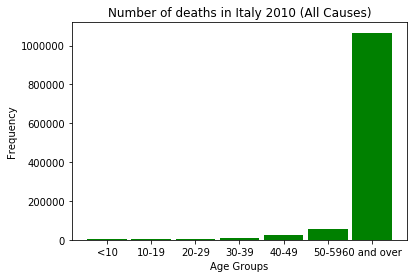

In [43]:
# x-coordinates of left sides of bars  
left = [1, 2, 3, 4, 5, 6, 7] 
  
# heights of bars 
height = [4868, 2226, 5132, 10354, 26068, 54078, 1066504]
  
# labels for bars 
tick_label = ['<10', '10-19', '20-29', '30-39', '40-49','50-59','60 and over'] 

# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.90, color = ['green']) 
  
# naming the x-axis 
plt.xlabel('Age Groups') 
# naming the y-axis 
plt.ylabel('Frequency') 
# plot title 
plt.title('Number of deaths in Italy 2010 (All Causes)') 
  
# function to show the plot 
plt.show() 

In [88]:
#What were the top five causes of death (top five ICD-10 terms) in Italy across all
#years for the Neoplasm ICD10-category (C00-D48)?
#o Generate a table with the cause of death, the number of deaths, and the
#proportion of overall deaths.
#o Generate a pie chart to visualize the proportion of deaths.

In [45]:
icd_codes1 = italy_flat[(italy_flat.Cause >= 'C00') & (italy_flat.Cause <= 'C97')]

In [46]:
icd_codes1

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
1675657     4180     NaN    NaN  2010  104  C000    1      0         1   
1675658     4180     NaN    NaN  2010  104  C000    2      0         1   
1675659     4180     NaN    NaN  2010  104  C001    1      0         1   
1675660     4180     NaN    NaN  2010  104  C001    2      0         1   
1675661     4180     NaN    NaN  2010  104  C006    1      0         1   
1675662     4180     NaN    NaN  2010  104  C009    1      0         1   
1675663     4180     NaN    NaN  2010  104  C009    2      0         1   
1675664     4180     NaN    NaN  2010  104   C01    1      0         1   
1675665     4180     NaN    NaN  2010  104   C01    2      0         1   
1675666     4180     NaN    NaN  2010  104  C021    1      0         1   
1675667     4180     NaN    NaN  2010  104  C022    1      0         1   
1675668     4180     NaN    NaN  2010  104  C023    1      0         1   
1675669     4180     NaN    NaN  2010  104  C024    1      0         1   
1675670     4180     NaN    NaN  2010  104  C029    1      0         1   
1675671     4180     NaN    NaN  2010  104  C029    2      0         1   
1675672     4180     NaN    NaN  2010  104  C030    1      0         1   
1675673     4180     NaN    NaN  2010  104  C030    2      0         1   
1675674     4180     NaN    NaN  2010  104  C031    1      0         1   
1675675     4180     NaN    NaN  2010  104  C031    2      0         1   
1675676     4180     NaN    NaN  2010  104  C039    1      0         1   
1675677     4180     NaN    NaN  2010  104  C039    2      0         1   
1675678     4180     NaN    NaN  2010  104  C040    1      0         1   
1675679     4180     NaN    NaN  2010  104  C049    1      0         1   
1675680     4180     NaN    NaN  2010  104  C049    2      0         1   
1675681     4180     NaN    NaN  2010  104  C050    1      0         1   
1675682     4180     NaN    NaN  2010  104  C050    2      0         1   
1675683     4180     NaN    NaN  2010  104  C051    1      0         1   
1675684     4180     NaN    NaN  2010  104  C051    2      0         1   
1675685     4180     NaN    NaN  2010  104  C052    1      0         1   
1675686     4180     NaN    NaN  2010  104  C052    2      0         1   
...          ...     ...    ...   ...  ...   ...  ...    ...       ...   
1676238     4180     NaN    NaN  2010  104  C929    1      0         1   
1676239     4180     NaN    NaN  2010  104  C929    2      0         1   
1676240     4180     NaN    NaN  2010  104  C930    1      0         1   
1676241     4180     NaN    NaN  2010  104  C930    2      0         1   
1676242     4180     NaN    NaN  2010  104  C931    1      0         1   
1676243     4180     NaN    NaN  2010  104  C931    2      0         1   
1676244     4180     NaN    NaN  2010  104  C939    1      0         1   
1676245     4180     NaN    NaN  2010  104  C939    2      0         1   
1676246     4180     NaN    NaN  2010  104  C940    1      0         1   
1676247     4180     NaN    NaN  2010  104  C940    2      0         1   
1676248     4180     NaN    NaN  2010  104  C944    1      0         1   
1676249     4180     NaN    NaN  2010  104  C944    2      0         1   
1676250     4180     NaN    NaN  2010  104  C947    1      0         1   
1676251     4180     NaN    NaN  2010  104  C947    2      0         1   
1676252     4180     NaN    NaN  2010  104  C950    1      0         1   
1676253     4180     NaN    NaN  2010  104  C950    2      0         1   
1676254     4180     NaN    NaN  2010  104  C951    1      0         1   
1676255     4180     NaN    NaN  2010  104  C951    2      0         1   
1676256     4180     NaN    NaN  2010  104  C959    1      0         1   
1676257     4180     NaN    NaN  2010  104  C959    2      0         1   
1676258     4180     NaN    NaN  2010  104  C960    2      0         1   
1676259     4180     NaN    NaN  2010  104  C962    2      0         1   
1676260     4

In [47]:
icd_codes1.groupby('Cause')['Deaths1'].sum()

Cause
C000       7
C001      27
C006       1
C009      31
C01       95
C021       3
C022       1
C023       1
C024       1
C029     455
C030      14
C031       3
C039      15
C040       1
C049      42
C050      11
C051      23
C052       4
C059      36
C060       5
C061       1
C062      13
C068       3
C069     492
C07      243
C080      16
C081       1
C089      53
C090       3
C091       1
        ... 
C910     355
C911    1317
C913      14
C914      32
C915      12
C917       1
C919     105
C920    2067
C921     421
C922       1
C923       5
C924      46
C925      87
C927      82
C929     177
C930      13
C931       9
C939       8
C940       2
C944       4
C947       4
C950     641
C951      76
C959     369
C960       1
C962       2
C966       3
C967      43
C968       2
C969      95
Name: Deaths1, Length: 346, dtype: int64

In [48]:
icd_codes2 = italy_flat[(italy_flat.Cause >= 'D00') & (italy_flat.Cause <= 'D48')]

In [49]:
icd_codes2.groupby('Cause')['Deaths1'].sum()

Cause
D049       1
D075       1
D125       1
D126      30
D130       1
D131       3
D134       7
D136       2
D137       3
D143       2
D150      22
D151      10
D152       1
D160       1
D164       1
D165       1
D171       1
D172       1
D179       1
D180      28
D181      32
D213       1
D24        1
D259       6
D27        4
D303       5
D320     299
D321       4
D329     230
D330       2
        ... 
D414     912
D417       1
D419       2
D421       1
D429       8
D430    1307
D431      37
D432      56
D433       1
D434       3
D437       2
D439       2
D440      27
D441      11
D443       9
D444      20
D445       4
D446       1
D448       1
D449       5
D45      105
D462      29
D464      95
D467       9
D469    1192
D471     530
D472     177
D473      73
D477       4
D479     154
Name: Deaths1, Length: 94, dtype: int64

In [93]:
icd_codes1

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
1675657     4180     NaN    NaN  2010  104  C000    1      0         1   
1675658     4180     NaN    NaN  2010  104  C000    2      0         1   
1675659     4180     NaN    NaN  2010  104  C001    1      0         1   
1675660     4180     NaN    NaN  2010  104  C001    2      0         1   
1675661     4180     NaN    NaN  2010  104  C006    1      0         1   
1675662     4180     NaN    NaN  2010  104  C009    1      0         1   
1675663     4180     NaN    NaN  2010  104  C009    2      0         1   
1675664     4180     NaN    NaN  2010  104   C01    1      0         1   
1675665     4180     NaN    NaN  2010  104   C01    2      0         1   
1675666     4180     NaN    NaN  2010  104  C021    1      0         1   
1675667     4180     NaN    NaN  2010  104  C022    1      0         1   
1675668     4180     NaN    NaN  2010  104  C023    1      0         1   
1675669     4180     NaN    NaN  2010  104  C024    1      0         1   
1675670     4180     NaN    NaN  2010  104  C029    1      0         1   
1675671     4180     NaN    NaN  2010  104  C029    2      0         1   
1675672     4180     NaN    NaN  2010  104  C030    1      0         1   
1675673     4180     NaN    NaN  2010  104  C030    2      0         1   
1675674     4180     NaN    NaN  2010  104  C031    1      0         1   
1675675     4180     NaN    NaN  2010  104  C031    2      0         1   
1675676     4180     NaN    NaN  2010  104  C039    1      0         1   
1675677     4180     NaN    NaN  2010  104  C039    2      0         1   
1675678     4180     NaN    NaN  2010  104  C040    1      0         1   
1675679     4180     NaN    NaN  2010  104  C049    1      0         1   
1675680     4180     NaN    NaN  2010  104  C049    2      0         1   
1675681     4180     NaN    NaN  2010  104  C050    1      0         1   
1675682     4180     NaN    NaN  2010  104  C050    2      0         1   
1675683     4180     NaN    NaN  2010  104  C051    1      0         1   
1675684     4180     NaN    NaN  2010  104  C051    2      0         1   
1675685     4180     NaN    NaN  2010  104  C052    1      0         1   
1675686     4180     NaN    NaN  2010  104  C052    2      0         1   
...          ...     ...    ...   ...  ...   ...  ...    ...       ...   
1676238     4180     NaN    NaN  2010  104  C929    1      0         1   
1676239     4180     NaN    NaN  2010  104  C929    2      0         1   
1676240     4180     NaN    NaN  2010  104  C930    1      0         1   
1676241     4180     NaN    NaN  2010  104  C930    2      0         1   
1676242     4180     NaN    NaN  2010  104  C931    1      0         1   
1676243     4180     NaN    NaN  2010  104  C931    2      0         1   
1676244     4180     NaN    NaN  2010  104  C939    1      0         1   
1676245     4180     NaN    NaN  2010  104  C939    2      0         1   
1676246     4180     NaN    NaN  2010  104  C940    1      0         1   
1676247     4180     NaN    NaN  2010  104  C940    2      0         1   
1676248     4180     NaN    NaN  2010  104  C944    1      0         1   
1676249     4180     NaN    NaN  2010  104  C944    2      0         1   
1676250     4180     NaN    NaN  2010  104  C947    1      0         1   
1676251     4180     NaN    NaN  2010  104  C947    2      0         1   
1676252     4180     NaN    NaN  2010  104  C950    1      0         1   
1676253     4180     NaN    NaN  2010  104  C950    2      0         1   
1676254     4180     NaN    NaN  2010  104  C951    1      0         1   
1676255     4180     NaN    NaN  2010  104  C951    2      0         1   
1676256     4180     NaN    NaN  2010  104  C959    1      0         1   
1676257     4180     NaN    NaN  2010  104  C959    2      0         1   
1676258     4180     NaN    NaN  2010  104  C960    2      0         1   
1676259     4180     NaN    NaN  2010  104  C962    2      0         1   
1676260     4

In [96]:
#realised i made a mistake and was analysing only 2010 data, but the question asks for all years
#so back to square one


country_codes = ["4180"]

lookup_bothicd.Country.isin(country_codes)

country_deaths= lookup_bothicd[lookup_bothicd.Country.isin(country_codes)]

country_deaths.shape

(63356, 39)

In [100]:
italy_neoplasms1 = country_deaths[(country_deaths.Cause >= 'C00') & (country_deaths.Cause <= 'C97')]

In [103]:
italy_neoplasms1.head()

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
1053596     4180     NaN    NaN  2003  104  C000    1      0         1   
1053597     4180     NaN    NaN  2003  104  C000    2      0         1   
1053598     4180     NaN    NaN  2003  104  C001    1      0         1   
1053599     4180     NaN    NaN  2003  104  C001    2      0         1   
1053600     4180     NaN    NaN  2003  104  C009    1      0         1   

         Deaths1     ...      Deaths21  Deaths22  Deaths23  Deaths24  \
1053596        2     ...           0.0       1.0       0.0       0.0   
1053597        7     ...           0.0       0.0       2.0       3.0   
1053598       21     ...           3.0       7.0       4.0       0.0   
1053599        5     ...           0.0       2.0       1.0       1.0   
1053600       24     ...           3.0       8.0       0.0       1.0   

         Deaths25  Deaths26  IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
1053596       0.0       0.0         0.0         0.0         0.0         0.0  
1053597       1.0       0.0         0.0         0.0         0.0         0.0  
1053598       0.0       0.0         0.0         0.0         0.0         0.0  
1053599       0.0       0.0         0.0         0.0         0.0         0.0  
1053600       0.0       0.0         0.0         0.0         0.0         0.0  

[5 rows x 39 columns]

In [104]:
italy_neoplasms2 = country_deaths[(country_deaths.Cause >= 'D00') & (country_deaths.Cause <= 'D48')]

In [106]:
italy_neoplasms2.head()

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
1054207     4180     NaN    NaN  2003  104  D042    1      0         1   
1054208     4180     NaN    NaN  2003  104  D051    2      0         1   
1054209     4180     NaN    NaN  2003  104  D103    2      0         1   
1054210     4180     NaN    NaN  2003  104  D110    1      0         1   
1054211     4180     NaN    NaN  2003  104  D119    2      0         1   

         Deaths1     ...      Deaths21  Deaths22  Deaths23  Deaths24  \
1054207        1     ...           0.0       0.0       0.0       1.0   
1054208        3     ...           0.0       1.0       0.0       1.0   
1054209        1     ...           0.0       0.0       1.0       0.0   
1054210        1     ...           0.0       0.0       0.0       1.0   
1054211        1     ...           0.0       0.0       1.0       0.0   

         Deaths25  Deaths26  IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
1054207       0.0       0.0         0.0         0.0         0.0         0.0  
1054208       0.0       0.0         0.0         0.0         0.0         0.0  
1054209       0.0       0.0         0.0         0.0         0.0         0.0  
1054210       0.0       0.0         0.0         0.0         0.0         0.0  
1054211       0.0       0.0         0.0         0.0         0.0         0.0  

[5 rows x 39 columns]

In [107]:
df = italy_neoplasms1

df2 = italy_neoplasms2

total_italy_neoplasms = df.append(df2)



In [108]:
total_italy_neoplasms.head()

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
1053596     4180     NaN    NaN  2003  104  C000    1      0         1   
1053597     4180     NaN    NaN  2003  104  C000    2      0         1   
1053598     4180     NaN    NaN  2003  104  C001    1      0         1   
1053599     4180     NaN    NaN  2003  104  C001    2      0         1   
1053600     4180     NaN    NaN  2003  104  C009    1      0         1   

         Deaths1     ...      Deaths21  Deaths22  Deaths23  Deaths24  \
1053596        2     ...           0.0       1.0       0.0       0.0   
1053597        7     ...           0.0       0.0       2.0       3.0   
1053598       21     ...           3.0       7.0       4.0       0.0   
1053599        5     ...           0.0       2.0       1.0       1.0   
1053600       24     ...           3.0       8.0       0.0       1.0   

         Deaths25  Deaths26  IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
1053596       0.0       0.0         0.0         0.0         0.0         0.0  
1053597       1.0       0.0         0.0         0.0         0.0         0.0  
1053598       0.0       0.0         0.0         0.0         0.0         0.0  
1053599       0.0       0.0         0.0         0.0         0.0         0.0  
1053600       0.0       0.0         0.0         0.0         0.0         0.0  

[5 rows x 39 columns]

In [118]:
group1 = total_italy_neoplasms.groupby('Cause')['Deaths1'].sum()

In [119]:
group1.head(5)

Cause
C000     68
C001    355
C002      1
C004      1
C005      2
Name: Deaths1, dtype: int64

In [129]:

indexed1 = group1.to_frame(name = 'count').reset_index()


In [130]:
indexed1.head(5)

Cause  count
0  C000     68
1  C001    355
2  C002      1
3  C004      1
4  C005      2

In [132]:
type(indexed1)

pandas.core.frame.DataFrame

In [134]:
sorted1 = indexed1.sort_values(by=['count'], ascending=False)

In [135]:
#this gives us the top 10 causes of death in italy
#across all years, where we can get our answer top 5
sorted1.head(10)

Cause   count
143  C349  426451
227  C509  155895
92   C189  143188
76   C169  125679
118  C259  120070
259   C61   95906
280  C679   71097
105  C229   58342
99   C220   54393
360  C809   54152

In [138]:
grand_total_deaths = sorted1['count'].sum()

In [139]:
grand_total_deaths

2239541

In [140]:
#to check this figure, we can sum up all deaths from the
#original icd death file, total_italy_neoplasms
check_italy_deaths = total_italy_neoplasms['Deaths1'].sum()

In [141]:
#we see that the figures match
check_italy_deaths

2239541

In [142]:
#now we can add a calcualted column with the proportion
#of deaths
sorted1['proportion'] = sorted1['count']/2239541

In [146]:
sorted1

Cause   count    proportion
143  C349  426451  1.904189e-01
227  C509  155895  6.961025e-02
92   C189  143188  6.393632e-02
76   C169  125679  5.611820e-02
118  C259  120070  5.361366e-02
259   C61   95906  4.282395e-02
280  C679   71097  3.174624e-02
105  C229   58342  2.605087e-02
99   C220   54393  2.428757e-02
360  C809   54152  2.417995e-02
389  C859   48344  2.158657e-02
268   C64   41962  1.873688e-02
94    C20   41199  1.839618e-02
245   C56   41196  1.839484e-02
394  C900   37688  1.682845e-02
359   C80   33186  1.481821e-02
119  C260   30638  1.368048e-02
405  C920   26392  1.178456e-02
67   C159   22888  1.021995e-02
244   C55   22585  1.008466e-02
296  C710   21782  9.726100e-03
136  C329   20212  9.025064e-03
437   C97   19922  8.895573e-03
110  C249   19499  8.706695e-03
305  C719   18906  8.441908e-03
90   C187   18621  8.314650e-03
582  D430   17441  7.787757e-03
176  C439   17279  7.715420e-03
398  C911   16953  7.569855e-03
106   C23   15763  7.038496e-03
..    ...     ...           ...
210  C488       1  4.465201e-07
222  C502       1  4.465201e-07
469  D140       1  4.465201e-07
456  D120       1  4.465201e-07
482  D167       1  4.465201e-07
262  C630       1  4.465201e-07
453  D109       1  4.465201e-07
452  D106       1  4.465201e-07
450  D099       1  4.465201e-07
543  D359       1  4.465201e-07
563  D386       1  4.465201e-07
449  D090       1  4.465201e-07
448  D075       1  4.465201e-07
248  C572       1  4.465201e-07
444  D048       1  4.465201e-07
443  D042       1  4.465201e-07
483  D168       1  4.465201e-07
441  D024       1  4.465201e-07
224  C505       1  4.465201e-07
440  D015       1  4.465201e-07
485  D170       1  4.465201e-07
432  C963       1  4.465201e-07
429  C960       1  4.465201e-07
538  D339       1  4.465201e-07
459  D127       1  4.465201e-07
257  C608       1  4.465201e-07
477  D161       1  4.465201e-07
494  D199       1  4.465201e-07
260  C620       1  4.465201e-07
495  D200       1  4.465201e-07

[611 rows x 3 columns]

In [145]:
proportion_check = sorted1['proportion'].sum()
proportion_check

1.0

In [147]:
#this gives us the required table
sorted1.head(5)

Cause   count  proportion
143  C349  426451    0.190419
227  C509  155895    0.069610
92   C189  143188    0.063936
76   C169  125679    0.056118
118  C259  120070    0.053614

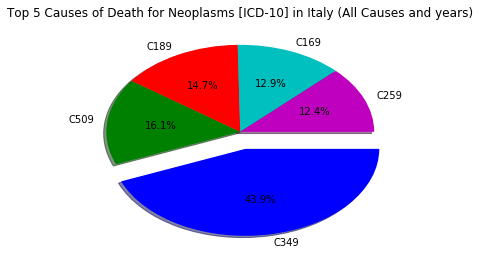

In [150]:
import matplotlib.pyplot as plt
 
values = [426451, 155895, 143188, 125679, 120070]
colors = ['b', 'g', 'r', 'c', 'm']
labels = ['C349', 'C509', 'C189', 'C169', 'C259']
explode = (0.2, 0, 0, 0, 0)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Top 5 Causes of Death for Neoplasms [ICD-10] in Italy (All Causes and years)')
plt.show()

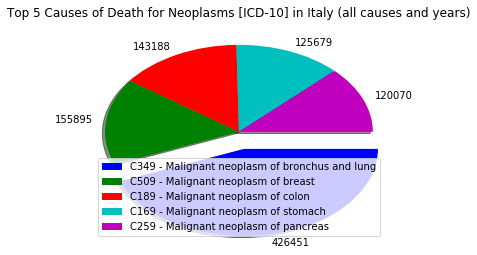

In [162]:
import matplotlib.pyplot as plt
 
values = [426451, 155895, 143188, 125679, 120070]
colors = ['b', 'g', 'r', 'c', 'm']
labels = ['C349 - Malignant neoplasm of bronchus and lung', 'C509 - Malignant neoplasm of breast', 'C189 - Malignant neoplasm of colon', 'C169 - Malignant neoplasm of stomach', 'C259 - Malignant neoplasm of pancreas']
#labels = ['C349', 'C509', 'C189', 'C169', 'C259']
explode = (0.2, 0, 0, 0, 0)
plt.pie(values, colors=colors, labels= values,explode=explode,counterclock=False, shadow=True)
plt.title('Top 5 Causes of Death for Neoplasms [ICD-10] in Italy (all causes and years)')
plt.legend(labels,loc=8)
plt.show()


In [117]:
total_italy_neoplasms.head(10)

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
1053596     4180     NaN    NaN  2003  104  C000    1      0         1   
1053597     4180     NaN    NaN  2003  104  C000    2      0         1   
1053598     4180     NaN    NaN  2003  104  C001    1      0         1   
1053599     4180     NaN    NaN  2003  104  C001    2      0         1   
1053600     4180     NaN    NaN  2003  104  C009    1      0         1   
1053601     4180     NaN    NaN  2003  104  C009    2      0         1   
1053602     4180     NaN    NaN  2003  104   C01    1      0         1   
1053603     4180     NaN    NaN  2003  104   C01    2      0         1   
1053604     4180     NaN    NaN  2003  104  C028    1      0         1   
1053605     4180     NaN    NaN  2003  104  C029    1      0         1   

         Deaths1     ...      Deaths21  Deaths22  Deaths23  Deaths24  \
1053596        2     ...           0.0       1.0       0.0       0.0   
1053597        7     ...           0.0       0.0       2.0       3.0   
1053598       21     ...           3.0       7.0       4.0       0.0   
1053599        5     ...           0.0       2.0       1.0       1.0   
1053600       24     ...           3.0       8.0       0.0       1.0   
1053601        7     ...           1.0       1.0       2.0       1.0   
1053602       91     ...          15.0       7.0       0.0       0.0   
1053603       16     ...           4.0       0.0       1.0       1.0   
1053604        1     ...           0.0       0.0       0.0       0.0   
1053605      297     ...          36.0      24.0       7.0       5.0   

         Deaths25  Deaths26  IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
1053596       0.0       0.0         0.0         0.0         0.0         0.0  
1053597       1.0       0.0         0.0         0.0         0.0         0.0  
1053598       0.0       0.0         0.0         0.0         0.0         0.0  
1053599       0.0       0.0         0.0         0.0         0.0         0.0  
1053600       0.0       0.0         0.0         0.0         0.0         0.0  
1053601       1.0       0.0         0.0         0.0         0.0         0.0  
1053602       0.0       0.0         0.0         0.0         0.0         0.0  
1053603       0.0       0.0         0.0         0.0         0.0         0.0  
1053604       0.0       0.0         0.0         0.0         0.0         0.0  
1053605       1.0       0.0         0.0         0.0         0.0         0.0  

[10 rows x 39 columns]

In [113]:

new_df = total_italy_neoplasms.groupby(['Cause','Deaths1'], sort=True).sum().reset_index()
new_df = new_df.sort_values(by = ['Deaths1'], ascending=False)
print(new_df)




     Cause  Deaths1  Country  Admin1   Year  Sex  Frmat  IM_Frmat  Deaths2  \
1679  C349    25564     4180     0.0   2003    1      0         1      0.0   
1678  C349    25224     4180     0.0   2010    1      0         1      0.0   
1677  C349    25199     4180     0.0   2006    1      0         1      0.0   
1676  C349    25167     4180     0.0   2007    1      0         1      0.0   
1675  C349    25160     4180     0.0   2009    1      0         1      0.0   
1674  C349    25139     4180     0.0   2008    1      0         1      0.0   
1673  C349    25119     4180     0.0   2005    1      0         1      0.0   
1672  C349    25046     4180     0.0   2004    1      0         1      0.0   
1671  C349    25001     4180     0.0   2011    1      0         1      0.0   
1670  C349    24653     4180     0.0   2012    1      0         1      1.0   
1669  C349    24353     4180     0.0   2013    1      0         1      0.0   
1668  C349    24208     4180     0.0   2015    1      0         

In [197]:
country_deaths.head(3)

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
1322928     5020     NaN    NaN  1998  104  A021    2      0         1   
1322929     5020     NaN    NaN  1998  104  A047    1      0         1   
1322930     5020     NaN    NaN  1998  104  A047    2      0         1   

         Deaths1     ...      Deaths21  Deaths22  Deaths23  Deaths24  \
1322928        1     ...           0.0       0.0       1.0       0.0   
1322929        1     ...           0.0       0.0       0.0       1.0   
1322930        4     ...           2.0       0.0       0.0       2.0   

         Deaths25  Deaths26  IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
1322928       0.0       0.0         0.0         0.0         0.0         0.0  
1322929       0.0       0.0         0.0         0.0         0.0         0.0  
1322930       0.0       0.0         0.0         0.0         0.0         0.0  

[3 rows x 39 columns]

In [ ]:
neoplasms

In [51]:
#Now we need to bring in the data for Australia for neoplasms to answer the next set of questions
australia_flat = countries_icd_2010[(countries_icd_2010.Country == 5020) & (countries_icd_2010.Year == 2010)]

In [52]:
australia_flat

Empty DataFrame
Columns: [Country, Admin1, SubDiv, Year, List, Cause, Sex, Frmat, IM_Frmat, Deaths1, Deaths2, Deaths3, Deaths4, Deaths5, Deaths6, Deaths7, Deaths8, Deaths9, Deaths10, Deaths11, Deaths12, Deaths13, Deaths14, Deaths15, Deaths16, Deaths17, Deaths18, Deaths19, Deaths20, Deaths21, Deaths22, Deaths23, Deaths24, Deaths25, Deaths26, IM_Deaths1, IM_Deaths2, IM_Deaths3, IM_Deaths4]
Index: []

[0 rows x 39 columns]

In [167]:
country_codes = ["5020"]

lookup_pop.Country.isin(countries)

country_pop= lookup_pop[lookup_pop.Country.isin(country_codes)]

country_pop.shape

(132, 33)

In [55]:
country_pop.head()

Country  Admin1 SubDiv  Year  Sex  Frmat       Pop1     Pop2     Pop3  \
9077     5020     NaN    NaN  1950    1      1  4122900.0  94500.0  89700.0   
9078     5020     NaN    NaN  1950    2      1  4055800.0  90400.0  85800.0   
9079     5020     NaN    NaN  1951    1      1  4253700.0  96900.0  95400.0   
9080     5020     NaN    NaN  1951    2      1  4168000.0  92500.0  91300.0   
9081     5020     NaN    NaN  1952    1      1  4372600.0  99000.0  97100.0   

         Pop4    ...        Pop18     Pop19     Pop20    Pop21    Pop22  \
9077  91100.0    ...     174700.0  127200.0   84200.0  51300.0  27500.0   
9078  87000.0    ...     182000.0  139700.0  100500.0  63800.0  37300.0   
9079  91600.0    ...     178300.0  130600.0   87600.0  51300.0  28300.0   
9080  87400.0    ...     186700.0  144100.0  105100.0  65500.0  38500.0   
9081  96200.0    ...     181000.0  134100.0   90500.0  51900.0  28400.0   

        Pop23  Pop24  Pop25  Pop26        Lb  
9077  12900.0    NaN    NaN    0.0   97830.0  
9078  19100.0    NaN    NaN    0.0   92761.0  
9079  13100.0    NaN    NaN    0.0   99401.0  
9080  19600.0    NaN    NaN    0.0   93897.0  
9081  13100.0    NaN    NaN    0.0  103381.0  

[5 rows x 33 columns]

In [56]:
#slicing out only the year of iterest 2010
year_interest = ["2010"]

country_pop.Year.isin(countries)

countries_2010= country_pop[country_pop.Year.isin(year_interest)]

countries_2010.shape

(2, 33)

In [57]:
countries_2010

Country  Admin1 SubDiv  Year  Sex  Frmat        Pop1      Pop2  \
9197     5020     NaN    NaN  2010    1      0  11100244.0  148602.0   
9198     5020     NaN    NaN  2010    2      0  11197271.0  140766.0   

          Pop3      Pop4    ...        Pop18     Pop19     Pop20     Pop21  \
9197  152751.0  150726.0    ...     603179.0  449449.0  343395.0  256917.0   
9198  144762.0  143595.0    ...     608012.0  458728.0  366657.0  296145.0   

         Pop22     Pop23    Pop24    Pop25  Pop26        Lb  
9197  188988.0   98056.0  31042.0   7006.0    0.0  152739.0  
9198  250921.0  167271.0  68896.0  22168.0    0.0  145164.0  

[2 rows x 33 columns]

In [58]:
#now we can group by country and sum the male and female total
#population to get the total country population in 2010
countries_2010.groupby('Country')['Pop1'].sum()

Country
5020    22297515.0
Name: Pop1, dtype: float64

In [ ]:
#This gives us the answer to the population of Australia in 2010
#total 2010 population for the countries of interest
#Australia 22,297,515

In [61]:
lookup_bothicd.head()

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  Deaths1  \
0     1400     NaN    NaN  2001  101  1000    1      7         8      332   
1     1400     NaN    NaN  2001  101  1000    2      7         8      222   
2     1400     NaN    NaN  2001  101  1001    1      7         8       24   
3     1400     NaN    NaN  2001  101  1001    2      7         8       14   
4     1400     NaN    NaN  2001  101  1002    1      7         8        0   

      ...      Deaths21  Deaths22  Deaths23  Deaths24  Deaths25  Deaths26  \
0     ...          95.0       NaN       NaN       NaN       NaN       0.0   
1     ...         112.0       NaN       NaN       NaN       NaN       0.0   
2     ...           5.0       NaN       NaN       NaN       NaN       0.0   
3     ...           6.0       NaN       NaN       NaN       NaN       0.0   
4     ...           0.0       NaN       NaN       NaN       NaN       0.0   

   IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
0         8.0         NaN         NaN         NaN  
1        11.0         NaN         NaN         NaN  
2         0.0         NaN         NaN         NaN  
3         0.0         NaN         NaN         NaN  
4         0.0         NaN         NaN         NaN  

[5 rows x 39 columns]

In [168]:
country_codes = ["5020"]

lookup_bothicd.Country.isin(country_codes)

country_deaths= lookup_bothicd[lookup_bothicd.Country.isin(country_codes)]

country_deaths.shape

(60396, 39)

In [198]:
country_deaths.head(3)

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
1322928     5020     NaN    NaN  1998  104  A021    2      0         1   
1322929     5020     NaN    NaN  1998  104  A047    1      0         1   
1322930     5020     NaN    NaN  1998  104  A047    2      0         1   

         Deaths1     ...      Deaths21  Deaths22  Deaths23  Deaths24  \
1322928        1     ...           0.0       0.0       1.0       0.0   
1322929        1     ...           0.0       0.0       0.0       1.0   
1322930        4     ...           2.0       0.0       0.0       2.0   

         Deaths25  Deaths26  IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
1322928       0.0       0.0         0.0         0.0         0.0         0.0  
1322929       0.0       0.0         0.0         0.0         0.0         0.0  
1322930       0.0       0.0         0.0         0.0         0.0         0.0  

[3 rows x 39 columns]

In [199]:
all_aus_deaths = country_deaths.groupby('Cause')['Deaths1'].sum()

In [200]:
all_aus_deaths.head(3)

Cause
A000     1
A010     1
A020    66
Name: Deaths1, dtype: int64

In [174]:
icd_codes_aus1 = country_deaths[(country_deaths.Cause >= 'C00') & (country_deaths.Cause <= 'C97')]

In [176]:
icd_codes_aus1.head(3)

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
1323109     5020     NaN    NaN  1998  104  C001    1      0         1   
1323110     5020     NaN    NaN  1998  104  C001    2      0         1   
1323111     5020     NaN    NaN  1998  104  C005    2      0         1   

         Deaths1     ...      Deaths21  Deaths22  Deaths23  Deaths24  \
1323109        1     ...           0.0       0.0       0.0       0.0   
1323110        1     ...           0.0       0.0       0.0       1.0   
1323111        1     ...           0.0       0.0       1.0       0.0   

         Deaths25  Deaths26  IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
1323109       0.0       0.0         0.0         0.0         0.0         0.0  
1323110       0.0       0.0         0.0         0.0         0.0         0.0  
1323111       0.0       0.0         0.0         0.0         0.0         0.0  

[3 rows x 39 columns]

In [177]:
icd_codes_aus2 = country_deaths[(country_deaths.Cause >= 'D00') & (country_deaths.Cause <= 'D48')]

In [179]:
icd_codes_aus2.head(3)

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
1323607     5020     NaN    NaN  1998  104  D022    2      0         1   
1323608     5020     NaN    NaN  1998  104  D023    2      0         1   
1323609     5020     NaN    NaN  1998  104  D101    2      0         1   

         Deaths1     ...      Deaths21  Deaths22  Deaths23  Deaths24  \
1323607        1     ...           0.0       0.0       0.0       0.0   
1323608        1     ...           0.0       0.0       1.0       0.0   
1323609        1     ...           0.0       0.0       0.0       1.0   

         Deaths25  Deaths26  IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
1323607       0.0       0.0         0.0         0.0         0.0         0.0  
1323608       0.0       0.0         0.0         0.0         0.0         0.0  
1323609       0.0       0.0         0.0         0.0         0.0         0.0  

[3 rows x 39 columns]

In [180]:
frame1 = icd_codes_aus1

frame2 = icd_codes_aus2

total_aus_neoplasms = df.append(frame2)

In [182]:
total_aus_neoplasms.head(3)

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
1053596     4180     NaN    NaN  2003  104  C000    1      0         1   
1053597     4180     NaN    NaN  2003  104  C000    2      0         1   
1053598     4180     NaN    NaN  2003  104  C001    1      0         1   

         Deaths1     ...      Deaths21  Deaths22  Deaths23  Deaths24  \
1053596        2     ...           0.0       1.0       0.0       0.0   
1053597        7     ...           0.0       0.0       2.0       3.0   
1053598       21     ...           3.0       7.0       4.0       0.0   

         Deaths25  Deaths26  IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
1053596       0.0       0.0         0.0         0.0         0.0         0.0  
1053597       1.0       0.0         0.0         0.0         0.0         0.0  
1053598       0.0       0.0         0.0         0.0         0.0         0.0  

[3 rows x 39 columns]

In [184]:
aus_group1 = total_aus_neoplasms.groupby('Cause')['Deaths1'].sum()

In [186]:
aus_group1.head(3)

Cause
C000     68
C001    355
C002      1
Name: Deaths1, dtype: int64

In [187]:
aus_indexed1 = aus_group1.to_frame(name = 'count').reset_index()

In [189]:
aus_indexed1.head(3)

Cause  count
0  C000     68
1  C001    355
2  C002      1

In [190]:
aus_sorted1 = aus_indexed1.sort_values(by=['count'], ascending=False)

In [192]:
aus_sorted1.head(6)

Cause   count
143  C349  426451
227  C509  155895
92   C189  143188
76   C169  125679
118  C259  120070
259   C61   95906

In [165]:
array = ['Deaths1',
'Deaths2',
'Deaths3',
'Deaths4',
'Deaths5',
'Deaths6',
'Deaths7',
'Deaths8',
'Deaths9',
'Deaths10',
'Deaths11',
'Deaths12',
'Deaths13',
'Deaths14',
'Deaths15',
'Deaths16',
'Deaths17',
'Deaths18',
'Deaths19',
'Deaths20',
'Deaths21',
'Deaths22',
'Deaths23',
'Deaths24']

In [166]:
#Selecting out only 2010 now
year_interest = ["2010"]

country_deaths.Year.isin(year_interest)

countries_icd_2010= country_deaths[country_deaths.Year.isin(year_interest)]

countries_icd_2010.shape

(3777, 39)

In [ ]:
aus_neoplasms1 = country_deaths[(country_deaths.Cause >= 'C00') & (country_deaths.Cause <= 'C97')]

In [229]:
countries_icd_2010.head(3)

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
2259163     5020     NaN    NaN  2010  104  A020    1      0         1   
2259164     5020     NaN    NaN  2010  104  A020    2      0         1   
2259165     5020     NaN    NaN  2010  104  A021    1      0         1   

         Deaths1     ...      Deaths21  Deaths22  Deaths23  Deaths24  \
2259163        1     ...           0.0       0.0       0.0       0.0   
2259164        4     ...           0.0       2.0       0.0       0.0   
2259165        3     ...           0.0       0.0       0.0       0.0   

         Deaths25  Deaths26  IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
2259163       0.0       0.0         0.0         0.0         0.0         0.0  
2259164       1.0       0.0         0.0         0.0         0.0         0.0  
2259165       0.0       0.0         0.0         0.0         0.0         1.0  

[3 rows x 39 columns]

In [230]:
countries_icd_2010.groupby('Country')['Deaths1'].sum()

Country
5020    286946
Name: Deaths1, dtype: int64

In [231]:
pa=pd.DataFrame(countries_icd_2010)

In [232]:
pa.head(3)

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
2259163     5020     NaN    NaN  2010  104  A020    1      0         1   
2259164     5020     NaN    NaN  2010  104  A020    2      0         1   
2259165     5020     NaN    NaN  2010  104  A021    1      0         1   

         Deaths1     ...      Deaths21  Deaths22  Deaths23  Deaths24  \
2259163        1     ...           0.0       0.0       0.0       0.0   
2259164        4     ...           0.0       2.0       0.0       0.0   
2259165        3     ...           0.0       0.0       0.0       0.0   

         Deaths25  Deaths26  IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
2259163       0.0       0.0         0.0         0.0         0.0         0.0  
2259164       1.0       0.0         0.0         0.0         0.0         0.0  
2259165       0.0       0.0         0.0         0.0         0.0         1.0  

[3 rows x 39 columns]

In [233]:
australia_flat = countries_icd_2010[(countries_icd_2010.Country == 5020) & (countries_icd_2010.Year == 2010)]

In [234]:
australia_flat.head(3)

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
2259163     5020     NaN    NaN  2010  104  A020    1      0         1   
2259164     5020     NaN    NaN  2010  104  A020    2      0         1   
2259165     5020     NaN    NaN  2010  104  A021    1      0         1   

         Deaths1     ...      Deaths21  Deaths22  Deaths23  Deaths24  \
2259163        1     ...           0.0       0.0       0.0       0.0   
2259164        4     ...           0.0       2.0       0.0       0.0   
2259165        3     ...           0.0       0.0       0.0       0.0   

         Deaths25  Deaths26  IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
2259163       0.0       0.0         0.0         0.0         0.0         0.0  
2259164       1.0       0.0         0.0         0.0         0.0         0.0  
2259165       0.0       0.0         0.0         0.0         0.0         1.0  

[3 rows x 39 columns]

In [235]:
australia_dist = australia_flat.groupby(['Country'])['Deaths2','Deaths3','Deaths4','Deaths5','Deaths6','Deaths7','Deaths8','Deaths9','Deaths10','Deaths11','Deaths12','Deaths13','Deaths14','Deaths15','Deaths16','Deaths17','Deaths18','Deaths19','Deaths20','Deaths21','Deaths22','Deaths23','Deaths24','Deaths25','Deaths26'].sum()

In [236]:
australia_dist

Deaths2  Deaths3  Deaths4  Deaths5  Deaths6  Deaths7  Deaths8  \
Country                                                                  
5020      2458.0    202.0    130.0     66.0     54.0    282.0    280.0   

         Deaths9  Deaths10  Deaths11    ...     Deaths17  Deaths18  Deaths19  \
Country                                 ...                                    
5020      1058.0    1472.0    1674.0    ...      10920.0   15160.0   18718.0   

         Deaths20  Deaths21  Deaths22  Deaths23  Deaths24  Deaths25  Deaths26  
Country                                                                        
5020      24754.0   32744.0   48548.0   53574.0   35206.0   16734.0      28.0  

[1 rows x 25 columns]

In [ ]:
#using this set, we can determine the answer to question 4 part a - identify the top five age groups in Australia
#dying with neoplasms cause of death

australia_dist

first we need to select out the neoplasms

#aus_neo1 = australia_flat[(australia_flat.Cause >= 'C00') & (australia_flat.Cause <= 'C97')]


#aus_neo2 = australia_flat(australia_flat.Cause >= 'D00') & (australia_flat.Cause <= 'D48')]


#aus_frame1 = aus_neo1

#aus_frame2 = aus_neo1

#total_aus_frame = df.append(aus_frame2)




#aus_2010_1 = total_aus_frame.groupby('Cause')['Deaths1'].sum()





#aus_2010indexed1 = aus_2010_1.to_frame(name = 'count').reset_index()



#aus_2010sorted1 = aus_2010indexed1.sort_values(by=['count'], ascending=False)



In [237]:
aus_neo1 = australia_flat[(australia_flat.Cause >= 'C00') & (australia_flat.Cause <= 'C97')]

In [238]:
aus_neo1.head(3)

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
2259359     5020     NaN    NaN  2010  104  C001    1      0         1   
2259360     5020     NaN    NaN  2010  104  C001    2      0         1   
2259361     5020     NaN    NaN  2010  104  C009    1      0         1   

         Deaths1     ...      Deaths21  Deaths22  Deaths23  Deaths24  \
2259359        2     ...           0.0       1.0       0.0       0.0   
2259360        2     ...           0.0       1.0       0.0       0.0   
2259361        2     ...           0.0       1.0       0.0       0.0   

         Deaths25  Deaths26  IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
2259359       0.0       0.0         0.0         0.0         0.0         0.0  
2259360       0.0       0.0         0.0         0.0         0.0         0.0  
2259361       0.0       0.0         0.0         0.0         0.0         0.0  

[3 rows x 39 columns]

In [239]:
aus_neo2 = australia_flat[(australia_flat.Cause >= 'D00') & (australia_flat.Cause <= 'D48')]

In [240]:
aus_neo2.head(3)

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
2259816     5020     NaN    NaN  2010  104  D125    2      0         1   
2259817     5020     NaN    NaN  2010  104  D126    2      0         1   
2259818     5020     NaN    NaN  2010  104  D130    1      0         1   

         Deaths1     ...      Deaths21  Deaths22  Deaths23  Deaths24  \
2259816        1     ...           0.0       0.0       1.0       0.0   
2259817        1     ...           0.0       0.0       0.0       0.0   
2259818        1     ...           0.0       0.0       0.0       0.0   

         Deaths25  Deaths26  IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
2259816       0.0       0.0         0.0         0.0         0.0         0.0  
2259817       0.0       0.0         0.0         0.0         0.0         0.0  
2259818       0.0       0.0         0.0         0.0         0.0         0.0  

[3 rows x 39 columns]

In [241]:
aus_frame1 = aus_neo1

aus_frame2 = aus_neo2

total_aus_2010neo = df.append(aus_frame2)

In [242]:
total_aus_2010neo.head(5)

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
1053596     4180     NaN    NaN  2003  104  C000    1      0         1   
1053597     4180     NaN    NaN  2003  104  C000    2      0         1   
1053598     4180     NaN    NaN  2003  104  C001    1      0         1   
1053599     4180     NaN    NaN  2003  104  C001    2      0         1   
1053600     4180     NaN    NaN  2003  104  C009    1      0         1   

         Deaths1     ...      Deaths21  Deaths22  Deaths23  Deaths24  \
1053596        2     ...           0.0       1.0       0.0       0.0   
1053597        7     ...           0.0       0.0       2.0       3.0   
1053598       21     ...           3.0       7.0       4.0       0.0   
1053599        5     ...           0.0       2.0       1.0       1.0   
1053600       24     ...           3.0       8.0       0.0       1.0   

         Deaths25  Deaths26  IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
1053596       0.0       0.0         0.0         0.0         0.0         0.0  
1053597       1.0       0.0         0.0         0.0         0.0         0.0  
1053598       0.0       0.0         0.0         0.0         0.0         0.0  
1053599       0.0       0.0         0.0         0.0         0.0         0.0  
1053600       0.0       0.0         0.0         0.0         0.0         0.0  

[5 rows x 39 columns]

In [243]:
australia_neoplasm_2010 = australia_flat[(australia_flat.Country == 5020) & (australia_flat.Year == 2010)]

In [245]:
australia_neoplasm_2010.head(3)

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
2259163     5020     NaN    NaN  2010  104  A020    1      0         1   
2259164     5020     NaN    NaN  2010  104  A020    2      0         1   
2259165     5020     NaN    NaN  2010  104  A021    1      0         1   

         Deaths1     ...      Deaths21  Deaths22  Deaths23  Deaths24  \
2259163        1     ...           0.0       0.0       0.0       0.0   
2259164        4     ...           0.0       2.0       0.0       0.0   
2259165        3     ...           0.0       0.0       0.0       0.0   

         Deaths25  Deaths26  IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
2259163       0.0       0.0         0.0         0.0         0.0         0.0  
2259164       1.0       0.0         0.0         0.0         0.0         0.0  
2259165       0.0       0.0         0.0         0.0         0.0         1.0  

[3 rows x 39 columns]

In [248]:
type(australia_neoplasm_2010)

pandas.core.frame.DataFrame

In [213]:
aus_2010indexed1.head(5)

Cause  count
0  C000     68
1  C001    359
2  C002      1
3  C004      1
4  C005      2

In [214]:
aus_2010sorted1 = aus_2010indexed1.sort_values(by=['count'], ascending=False)

In [215]:
aus_2010sorted1.head(5)

Cause   count
143  C349  434440
227  C509  158760
92   C189  144926
76   C169  126683
118  C259  122437

In [218]:
aus_neo2.head(5)

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
2259816     5020     NaN    NaN  2010  104  D125    2      0         1   
2259817     5020     NaN    NaN  2010  104  D126    2      0         1   
2259818     5020     NaN    NaN  2010  104  D130    1      0         1   
2259819     5020     NaN    NaN  2010  104  D131    2      0         1   
2259820     5020     NaN    NaN  2010  104  D134    2      0         1   

         Deaths1     ...      Deaths21  Deaths22  Deaths23  Deaths24  \
2259816        1     ...           0.0       0.0       1.0       0.0   
2259817        1     ...           0.0       0.0       0.0       0.0   
2259818        1     ...           0.0       0.0       0.0       0.0   
2259819        1     ...           0.0       0.0       0.0       1.0   
2259820        1     ...           0.0       0.0       0.0       0.0   

         Deaths25  Deaths26  IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
2259816       0.0       0.0         0.0         0.0         0.0         0.0  
2259817       0.0       0.0         0.0         0.0         0.0         0.0  
2259818       0.0       0.0         0.0         0.0         0.0         0.0  
2259819       0.0       0.0         0.0         0.0         0.0         0.0  
2259820       0.0       0.0         0.0         0.0         0.0         0.0  

[5 rows x 39 columns]

In [83]:
australia_dist['<10'] = australia_dist['Deaths2'] + australia_dist['Deaths3'] + australia_dist['Deaths4'] + australia_dist['Deaths5'] + australia_dist['Deaths6'] + australia_dist['Deaths7']
australia_dist['10-19'] = australia_dist['Deaths8'] + australia_dist['Deaths9']
australia_dist['20-29'] = australia_dist['Deaths10'] + australia_dist['Deaths11']
australia_dist['30-39'] = australia_dist['Deaths12'] + australia_dist['Deaths13']
australia_dist['40-49'] = australia_dist['Deaths14'] + australia_dist['Deaths15']
australia_dist['50-59'] = australia_dist['Deaths16'] + australia_dist['Deaths17']
australia_dist['60 and over'] = australia_dist['Deaths18'] + australia_dist['Deaths19'] + australia_dist['Deaths20'] + australia_dist['Deaths21'] + australia_dist['Deaths22'] + australia_dist['Deaths23'] + australia_dist['Deaths24'] + australia_dist['Deaths25'] + australia_dist['Deaths26']

In [84]:
australia_dist

Deaths2  Deaths3  Deaths4  Deaths5  Deaths6  Deaths7  Deaths8  \
Country                                                                  
5020      2458.0    202.0    130.0     66.0     54.0    282.0    280.0   

         Deaths9  Deaths10  Deaths11     ...       Deaths24  Deaths25  \
Country                                  ...                            
5020      1058.0    1472.0    1674.0     ...        35206.0   16734.0   

         Deaths26     <10   10-19   20-29   30-39   40-49    50-59  \
Country                                                              
5020         28.0  3192.0  1338.0  3146.0  4928.0  9800.0  19076.0   

         60 and over  
Country               
5020        245466.0  

[1 rows x 32 columns]

In [85]:
australia_bands = australia_dist[['<10', '10-19','20-29','30-39','40-49','50-59','60 and over']]

In [86]:
australia_bands

<10   10-19   20-29   30-39   40-49    50-59  60 and over
Country                                                              
5020     3192.0  1338.0  3146.0  4928.0  9800.0  19076.0     245466.0

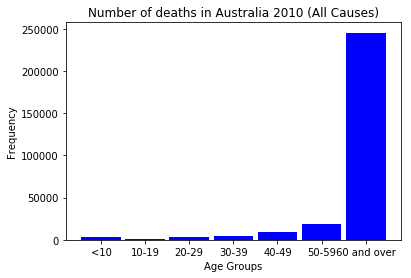

In [193]:
# x-coordinates of left sides of bars  
left = [1, 2, 3, 4, 5, 6, 7] 
  
# heights of bars 
height = [3192, 1338, 3146, 4928, 9800, 19076, 245466]
  
# labels for bars 
tick_label = ['<10', '10-19', '20-29', '30-39', '40-49','50-59','60 and over'] 

# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.90, color = ['blue']) 
  
# naming the x-axis 
plt.xlabel('Age Groups') 
# naming the y-axis 
plt.ylabel('Frequency') 
# plot title 
plt.title('Number of deaths in Australia 2010 (All Causes)') 
  
# function to show the plot 
plt.show() 